In [1]:
#ΤΟ ΘΕΛΩ ΠΑΝΤΟΤΕ
! pip install -U scikit-learn
#ΤΟ ΘΕΛΩ ΓΙΑ ΝΑ ΚΑΝΩ IMBALANCE ΤΟ DATASET ΜΟΥ
! pip install -U imbalanced-learn

Requirement already up-to-date: scikit-learn in c:\users\user\anaconda3\lib\site-packages (0.22.2.post1)


Requirement already up-to-date: imbalanced-learn in c:\users\user\anaconda3\lib\site-packages (0.6.2)


In [2]:
#ΧΡΗΣΙΜΑ ΕΡΓΑΛΕΙΑ ΠΟΥ ΑΡΓΑ Η ΓΡΗΓΟΡΑ ΘΑ ΤΑ ΤΑ ΧΡΕΙΑΣΤΕΙΣ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#ΜΑΘΗΜΑΤΙΚΑ ΕΡΓΑΛΕΙΑ
from math import sqrt


#ΧΡΗΣΙΜΟ ΓΙΑ ΝΑ ΠΑΡΕΙΣ ΓΡΑΦΙΚΕΣ ΠΑΡΑΣΤΑΣΕΙΣ
import seaborn as sns

#ΕΡΓΑΛΕΙΑ ΓΙΑ ΝΑ ΚΑΝΕΙς IMPUTE TO DATASET ΣΟΥ ΔΗΛΑΔΗ ΝΑ ΓΕΜΊΣΕΙΣ ΜΕ ΤΙΜΕΣ ΤΑ NaN ΚΕΛΙΑ - ΛΕΙΤΟΥΡΓΕΙ ΓΙΑ ΑΡΙΘΜΗΤΙΚΕς ΤΙΜΕΣ
from sklearn.impute import SimpleImputer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#ΓΙΑ ΝΑ ΚΑΝΕΙΣ LABEL ENCODER
from sklearn.preprocessing import LabelEncoder

#ΟΤΑΝ ΘΕΛΕΙΣ ΝΑ ΚΑΝΕΙΣ SPLIT ΤΟ DATASET ΣΟΥ ΣΕ TRAIN-TEST
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
#from sklearn.preprocessing import LabelEncoder

#ΕΡΓΑΛΕΙΑ ΓΙΑ ΝΑ ΠΡΑΓΜΑΤΟΠΟΙΗΣΩ ΙΜΒΑLANCE - OVERSAMPLING - UNDERSAMPLING
from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.under_sampling import TomekLinks
#from imblearn.over_sampling import SMOTE #ΠΡΟΚΑΛΕΙ ΘΕΜΑΤΑ ΟΤΑΝ ΕΧΟΥΜΕ ΤΕΡΑΣΤΙΕΣ ΔΙΑΦΟΡΕΣ , ΧΡΗΣΙΜΟΠΟΙΕΙ KNN
#from imblearn.combine import SMOTETomek
#from imblearn.under_sampling import ClusterCentroids

#ΕΡΓΑΛΕΙΑ ΓΙΑ RIGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

#ΓΙΑ ΝΑ ΚΑΝΕΙΣ CROSS VALIDATION
from sklearn.model_selection import cross_val_score

In [3]:
abalone = pd.read_csv("datasets-master-57dcb67ef80b25c53c6e3b19a7f147d3c477446b/Abalone/abalone.data.csv",header=None)

In [4]:
abalone.columns=['Sex','Lenght','Diameter','Height','Whole_Weight','Shucked_Weight','Viscera_Weight','Shell_Weight','Rings_Target']
abalone_data=pd.get_dummies(abalone,columns=['Sex'])
cols = list(abalone_data.columns.values) 
cols.pop(cols.index('Rings_Target')) 
abalone_data = abalone_data[cols+['Rings_Target']]

In [5]:
abalone_features_df=abalone_data.iloc[:,:10]
abalone_labels_df=abalone_data.iloc[:,[10]]
abalone_train, abalone_test, abalone_train_labels, abalone_test_labels = train_test_split(abalone_features_df, abalone_labels_df, test_size=0.2,random_state=1)
abalone_train.index = range(len(abalone_train))
abalone_test.index =range(len(abalone_test))
abalone_train_labels.index = range(len(abalone_train_labels))
abalone_test_labels.index = range(len(abalone_test_labels))

In [6]:
abalone_train.head()

,Lenght,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Sex_F,Sex_I,Sex_M
0,0.455,0.350,0.120,0.4835,0.1815,0.1440,0.160,0,0,1
1,0.255,0.195,0.055,0.0725,0.0285,0.0170,0.021,0,1,0
2,0.520,0.410,0.110,0.5185,0.2165,0.0915,0.184,0,1,0
3,0.620,0.470,0.155,0.9660,0.4470,0.1710,0.284,0,1,0
4,0.615,0.490,0.155,0.9885,0.4145,0.1950,0.345,0,1,0


In [7]:
def scaled_Standard(train,test):
    cols1=train.columns
    cols2=test.columns
    scaler = preprocessing.StandardScaler().fit(train)
    train_scaled = scaler.transform(train)
    test_scaled = scaler.transform(test)
    train_scaled=pd.DataFrame(data=train_scaled,columns=cols1)
    test_scaled=pd.DataFrame(data=test_scaled,columns=cols2)
    return train_scaled,test_scaled

def variance(train,test,thresh):
    #cols1=train.columns
    #cols2=test.columns
    variance_thresh = VarianceThreshold(thresh)
    x_train = variance_thresh.fit_transform(train)
    x_test = variance_thresh.transform(test)
    x_train=pd.DataFrame(data=x_train)#,columns=cols1)
    x_test=pd.DataFrame(data=x_test)#,columns=cols2)
    return x_train, x_test

def randomoversampler(train,train_labels):
    cols1=train.columns
    cols2=train_labels.columns
    ros = RandomOverSampler()
    X_ros, y_ros = ros.fit_sample(train, train_labels)
    X_ros=pd.DataFrame(data=X_ros,columns=cols1)
    y_ros=pd.DataFrame(data=y_ros,columns=cols2)
    return X_ros, y_ros

def pca(n,train,test):
    #cols1=train.columns
    #cols2=test.columns
    pcaa = PCA(n_components=n)
    trainPCA =  pcaa.fit_transform(train)
    testPCA = pcaa.transform(test)
    trainPCA=pd.DataFrame(data=trainPCA)#,columns=cols1)
    testPCA=pd.DataFrame(data=testPCA)#,columns=cols2)
    return trainPCA , testPCA

In [8]:
final_train,final_test=scaled_Standard(abalone_train,abalone_test)
final_train,final_test=variance(final_train,final_test,0.1)
final_train,final_train_labels=randomoversampler(final_train,abalone_train_labels)
#final_train,final_test=pca(7,final_train,final_test)

In [9]:
final_train=final_train
final_test=final_test
final_train_labels=final_train_labels
#final_test_labels=final_test_labels

final_test_labels=abalone_test_labels


In [10]:
final_test.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.692968,-0.679447,-0.924484,-0.769496,-0.770455,-0.852796,-0.779506,1.48021,-0.690188,-0.756462
1,0.343141,0.273463,0.242649,0.324918,0.993351,0.019213,-0.238245,-0.67558,-0.690188,1.321943
2,-1.273190,-1.281284,-0.807771,-1.210104,-1.209717,-1.113030,-1.171208,-0.67558,-0.690188,1.321943
3,0.467474,0.474075,-0.107491,-0.070005,0.207185,-0.122317,-0.252489,-0.67558,-0.690188,1.321943
4,0.011586,-0.177915,-0.107491,-0.465943,-0.597002,-0.451033,-0.209758,1.48021,-0.690188,-0.756462


### Εχω τελειώσει την προεργασία τον δεδομένων όπως στο Example

In [11]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
def linregression(Train,Label,Test):
    regressor = LinearRegression()  
    regressor.fit(Train,Label)
    y_pred = regressor.predict(Test)
    y_pred=pd.DataFrame(data=y_pred,columns=['Linear Prediction'])
    return y_pred


def ridgeregression(Train,Label,Test,alpha):
    regressor=Ridge(alpha=alpha)
    regressor.fit(Train,Label)
    y_pred = regressor.predict(Test)
    y_pred=pd.DataFrame(data=y_pred,columns=['Ridge Prediction'])
    return y_pred
    
    

In [12]:
prediction_Linear=linregression(final_train,final_train_labels,final_test)
prediction_Ridge=ridgeregression(final_train,final_train_labels,final_test,1.0)

In [13]:
visual=pd.concat([final_test_labels, prediction_Linear], axis=1)
visual=pd.concat([visual,prediction_Ridge], axis=1)

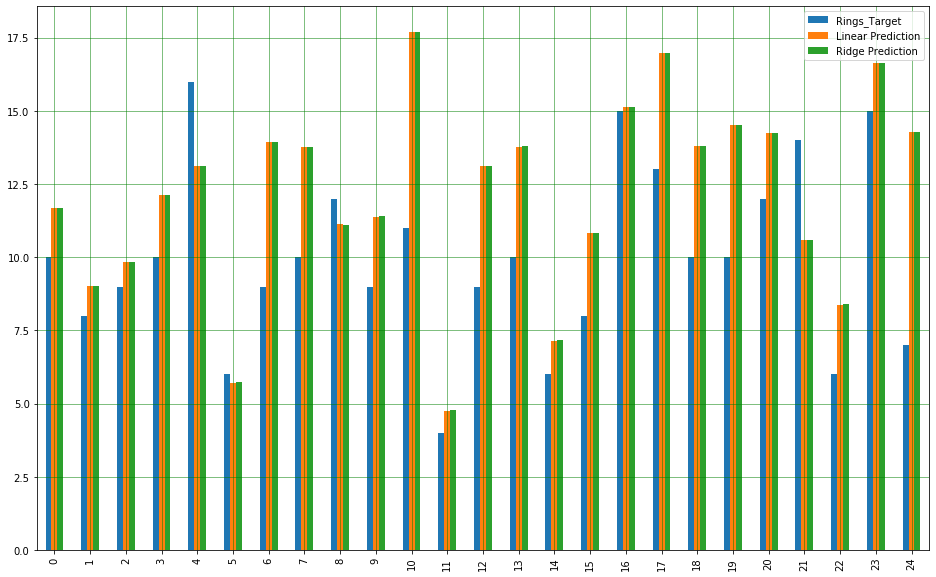

In [14]:
df1 = visual.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

* MAE is the easiest to understand, because it's the average error.
* MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
* RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
* All of these are loss functions, because we want to minimize them.

In [15]:
mae_linear = mean_absolute_error(final_test_labels, prediction_Linear)
mse_linear = mean_squared_error(final_test_labels, prediction_Linear)
rmse_linear=sqrt(mse_linear)

mae_ridge = mean_absolute_error(final_test_labels, prediction_Ridge)
mse_ridge = mean_squared_error(final_test_labels, prediction_Ridge)
rmse_ridge=sqrt(mse_ridge)

data = {'Linear':  [mae_linear,mse_linear ,rmse_linear],
        'Ridge': [mae_ridge,mse_ridge ,rmse_ridge],
        }

df = pd.DataFrame (data)
df.index=['mae','mse','rmse']

df

,Linear,Ridge
mae,2.713378,2.716031
mse,11.630979,11.632956
rmse,3.410422,3.410712


### Cross-Validation Για Εύρεση του κατάλληλου alpha και βελτιστοποίηση του Ridge Regression

Γενικότερα το Cross Validation χρησιμοποιείται για να αξιολογηθεί ένα μοντέλο , παράλληλα με την αξιολόγηση εδώ το χρησιμοποιούμε για parameter tuning
Με το k-Fold CV αυτό που γίνεται είναι να χωρίζεται το set σε κ σημεία , στην πρώτη επανάληψη τo 1 κομματι χρησιμοποιείται για testing και τα κ-1 για training στην δεύτερη επανάληψη κτλπ

In [16]:
def RidgeCV(low,high,Train,Label,Test,Test_Label):
    alpha = list(range(low,high))
    cv_scores = []
    # perform 5-fold cross validation
    for a in alpha:
        regressor=Ridge(alpha=a)
        scores = cross_val_score(regressor, Train, Label, cv=5, scoring='neg_mean_absolute_error')
        cv_scores.append(scores.mean())
    mean_error = [-x for x in cv_scores]
    # determining best alpha
    optimal_alpha = alpha[mean_error.index(min(mean_error))]
    print("The optimal alpha (calculated in the training set) is %d" % optimal_alpha)
    # για το optimal alpha παίρνουμε και τα αποτέλεσματα στο test set
    regressor = Ridge(alpha = optimal_alpha)
    regressor.fit(Train, Label)
    pred = regressor.predict(Test)
    print("\nOptimal mean_error on the test set is",  mean_absolute_error(Test_Label, pred), "with alpha=", optimal_alpha)
    pred=pd.DataFrame(data=pred,columns=['RidgeCV Prediction '])
    return pred

In [17]:
prediction_RidgeCV=RidgeCV(-150,150,final_train,final_train_labels,final_test,final_test_labels)

The optimal alpha (calculated in the training set) is -26

Optimal mean_error on the test set is 2.6601045643097128 with alpha= -26


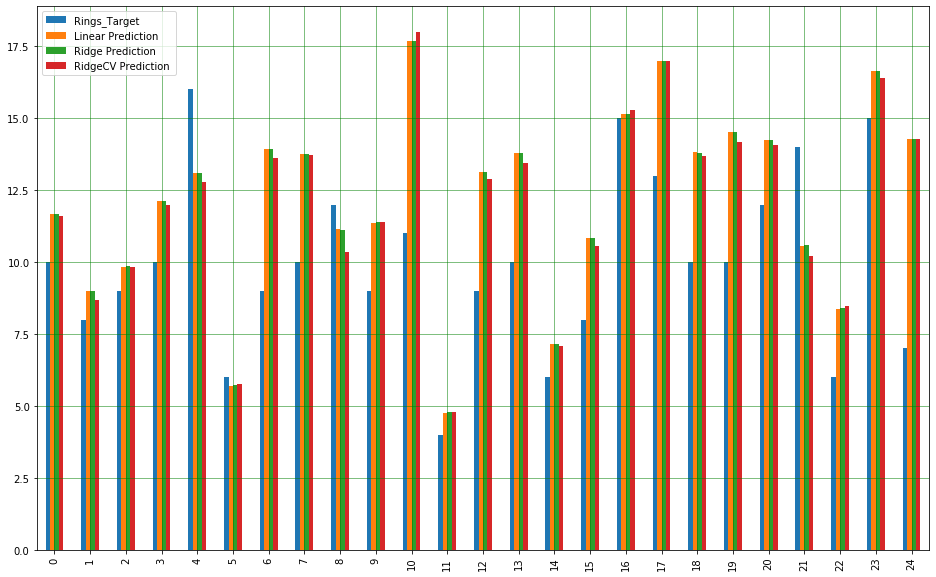

In [18]:
visual=pd.concat([visual,prediction_RidgeCV], axis=1)
df1 = visual.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [19]:
mae_ridgecv = mean_absolute_error(final_test_labels, prediction_RidgeCV)
mse_ridgecv = mean_squared_error(final_test_labels, prediction_RidgeCV)
rmse_ridgecv=sqrt(mse_ridgecv)


ridge = [mae_ridgecv,mse_ridgecv ,rmse_ridgecv]

df['RidgeCV']=ridge
df

,Linear,Ridge,RidgeCV
mae,2.713378,2.716031,2.660105
mse,11.630979,11.632956,11.482784
rmse,3.410422,3.410712,3.388626
